In [103]:
import tensorflow as tf
print(tf.__version__)

1.5.0


In [104]:
import numpy as np
import pandas as pd

In [3]:
emailData = pd.read_csv('LastFourbySub.csv')

In [4]:
print(type(emailData))

<class 'pandas.core.frame.DataFrame'>


In [5]:
emailData.dropna(axis = 0, how = 'any')
emailData = emailData.astype('int')
emailData.dtypes


SubscriberID    int64
Email1          int64
Email2          int64
Email3          int64
Email4          int64
dtype: object

In [6]:
from datetime import datetime

now =  datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}".format(root_logdir,now)


In [7]:
#converting a dataframe into a numpy array
emailDataArray = emailData.as_matrix()

In [8]:
emailDataArray

""" X_batch = np.array([
        [[0],
       [1],
        [1],
],
        [[1],
        [0],
        [0],

 ]])


y_batch = np.array([
        [[1],
        [1],
        [0],],
        [
        [1],
        [1],
        [1],
        ]
]) """

' X_batch = np.array([\n        [[0],\n       [1],\n        [1],\n],\n        [[1],\n        [0],\n        [0],\n\n ]])\n\n\ny_batch = np.array([\n        [[1],\n        [1],\n        [0],],\n        [\n        [1],\n        [1],\n        [1],\n        ]\n]) '

In [9]:
#separating inputs and outputs
emailData.columns
inputEmailArray = emailData.drop('SubscriberID',axis = 1)
len(inputEmailArray)
#X_batch_df = inputEmailArray.drop('Email3',axis =  1)
#Y_batch_df = inputEmailArray.drop('Email1',axis = 1)

#dropping columns using index
X_batch_df = inputEmailArray.drop(inputEmailArray.columns[-1], axis = 1)
#X_batch_df
Y_batch_df = inputEmailArray.drop(inputEmailArray.columns[0],axis = 1)
y_output = inputEmailArray.columns[-1]
print(y_output)

Email4


In [10]:
X_batch_array = X_batch_df.as_matrix()
X_batch_array = X_batch_array.reshape((-1,3,1))
#print("X"+str(len(X_batch_array)))

Y_batch_array  = Y_batch_df.as_matrix()

Y_batch_array = Y_batch_array.reshape((-1,3,1))
#print("Y"+str(len(Y_batch_array)))
X_batch_array




array([[[1],
        [0],
        [0]],

       [[0],
        [0],
        [0]],

       [[0],
        [1],
        [0]],

       ..., 
       [[1],
        [0],
        [0]],

       [[1],
        [1],
        [1]],

       [[0],
        [0],
        [0]]])

In [11]:
t =np.reshape(Y_batch_array,(-1,1))
print(t.shape)

(279621, 1)


In [12]:
#tf.reset_default_graph()
#value = tf.constant(1)


In [13]:
#X_b = X_b.reshape((-1,n_steps,1))
#E = emailDataArray.reshape((-1,4,1))
#print(E)

tf.reset_default_graph()
#reshaping is used for shaping the input for entry into the neural network. Its just splitting the columns as separate inputs
#n_iterations = 1500
#batch_size = 50

##X_batch = np.array([
 ##       [[0],
##      [1],
##        [1],
##],
##[
##    [0],
##    [0],
##    [1],
##]])


In [14]:
n_inputs = 1
n_neurons = 100
n_outputs = 1
n_steps = 3

X = tf.placeholder(tf.float64, [None, n_steps,n_inputs])
y = tf.placeholder(tf.float64, [None,n_steps, n_outputs])
#y = tf.placeholder(tf.int32, [None])

In [15]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
        tf.contrib.rnn.BasicRNNCell(num_units = n_neurons, activation = tf.nn.tanh), output_size = n_outputs)
outputs,states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float64)
#print(tf.get_default_graph().as_graph_def())

In [16]:
# using mean square error
learning_rate = 0.0001
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

In [17]:
a = np.array([
    [2],[1]
    
])
# This should be a 2 * 1 matrix : Result (2, 1)
print("first",a.shape)

# This should be a 3 * 1 matrix
a = np.array([
    [2],[1],[2]
])

print("second",a.shape)

# This should be a 1 * 2 matrix. Its actually 1 * 2 * 1
a = np.array([
    [[2],[2]]
])
print("third",a.shape)

#This is what 1 * 2 looks like
a = np.array([
    [2,2]
])
print("fourth",a.shape)


# This should be 2*2*1
a = np.array([
    [[2],[2]],
    [[1],[1]]
])
print("fifth",a.shape)

first (2, 1)
second (3, 1)
third (1, 2, 1)
fourth (1, 2)
fifth (2, 2, 1)


In [18]:
#using softmax and calculating accuracy
#print(states)
#states_concat = tf.concat(axis = 1, values = states)
#print(states_concat)
#learning_rate = 0.001
#logits = tf.layers.dense(states_concat,n_outputs)

#xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = logits)
#loss = tf.reduce_mean(xentropy)
#print(tf.reshape(y,[-1,1]))
#print(logits)
#optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
#training_op = optimizer.minimize(loss)
#y_output = tf.reshape(y,[-1],name = "y_output")
print(y_output)
#correct = tf.nn.in_top_k(logits,y_output,1)
#accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))


Email4


In [19]:
init = tf.global_variables_initializer()

In [20]:
mse_summary = tf.summary.scalar('Loss',loss)
file_writer = tf.summary.FileWriter(logdir,tf.get_default_graph())

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_batch_array,Y_batch_array,test_size = 0.33, random_state = 42)

In [22]:
#x = np.random.randint(num_training_examples // batch_size)
x

NameError: name 'x' is not defined

In [23]:

n_iterations = 1000
batch_size = 10000

num_training_examples = len(X_train)
loss_train_arr = []
epoch_arr = []
loss_test_arr = []
num_batches = num_training_examples / batch_size
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
       # for x in range(num_training_examples // batch_size):
        x = np.random.randint(num_training_examples // batch_size)
        batch_start_idx = x * batch_size
        batch_end_idx = batch_start_idx + batch_size
        X_b = X_train[batch_start_idx:batch_end_idx]
        y_b = y_train[batch_start_idx:batch_end_idx]
           # y_b =y_b.reshape([-1])
            #print(batch_start_idx)
           # print(batch_end_idx)
            #print(y_b.shape)
        sess.run(training_op, feed_dict = {X:X_b, y:y_b})
            #print(y_b)
        loss_train = loss.eval(session = sess,feed_dict = {X:X_b, y:y_b})
        loss_train_arr.append(loss_train)
        epoch_arr.append(iteration)
        loss_test = loss.eval(session = sess,feed_dict = {X:X_test, y:y_test})
        loss_test_arr.append(loss_test)
        print(iteration, "Train accuracy:", loss_train, "Test accuracy:", loss_test)
        

0 Train accuracy: 0.227900310385 Test accuracy: 0.226306281467
1 Train accuracy: 0.232960237879 Test accuracy: 0.223027144418
2 Train accuracy: 0.222949072232 Test accuracy: 0.219842725684
3 Train accuracy: 0.218099197291 Test accuracy: 0.216754303663
4 Train accuracy: 0.216150082882 Test accuracy: 0.213757146048
5 Train accuracy: 0.212307117006 Test accuracy: 0.210855456394
6 Train accuracy: 0.209419374251 Test accuracy: 0.208051273728
7 Train accuracy: 0.206718506365 Test accuracy: 0.205344086045
8 Train accuracy: 0.198907219594 Test accuracy: 0.20273569876
9 Train accuracy: 0.209609493109 Test accuracy: 0.200218855661
10 Train accuracy: 0.199799240394 Test accuracy: 0.197794394803
11 Train accuracy: 0.198482130884 Test accuracy: 0.195465897238
12 Train accuracy: 0.194540538063 Test accuracy: 0.193231718129
13 Train accuracy: 0.200238357311 Test accuracy: 0.191088617944
14 Train accuracy: 0.198128581755 Test accuracy: 0.189036262843
15 Train accuracy: 0.18848072799 Test accuracy: 0.1

KeyboardInterrupt: 

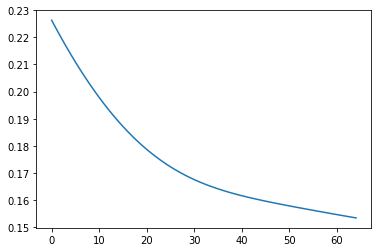

In [24]:
import matplotlib.pyplot as plt
plt.plot(epoch_arr,loss_test_arr)
plt.show()

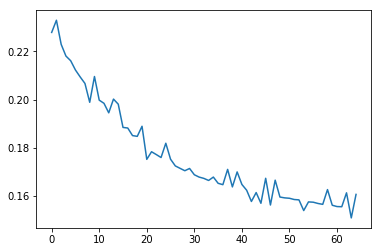

In [25]:
plt.plot(epoch_arr,loss_train_arr)
plt.show()

In [26]:
file_writer.close()

In [105]:
#Training the model with Six emails
emailDataSix = pd.read_csv('LastSixbySub.csv')
emailDataSix

,SubscriberID,6,5,4,3,2,1
0,198471644,1,0,0,0,0,1
1,219639656,0,0,0,0,0,0
2,169847416,0,0,1,0,1,1
3,165552796,0,0,0,0,0,1
4,119788716,0,0,1,1,0,0
5,84474920,0,1,1,1,1,0
6,202814671,0,0,0,0,0,0
7,63917114,0,1,0,1,0,1
8,68499442,1,1,0,1,0,0
9,150471116,0,0,0,0,0,1


In [107]:
emailDataSix.columns = ['SubscriberID','Email1','Email2','Email3','Email4','Email5','Email6']
#emailDataSix

In [108]:
inputs = emailDataSix.drop('SubscriberID',axis = 1)
inputs.dtypes
X_batch_df = inputs.drop(inputs.columns[-1], axis = 1)
Y_batch_df = inputs.drop(inputs.columns[0],axis = 1)
y_output = inputs.columns[-1]

#print(Y_batch_df)
#X_batch_array = X_batch_df.as_matrix()
#X_batch_array = X_batch_array.reshape([-1,5,1])
#print("X"+str(len(X_batch_array)))

#Y_batch_array  = Y_batch_df.as_matrix()

#Y_batch_array = Y_batch_array.reshape([-1,5,1])
#print("Y"+str(len(Y_batch_array)))
#print(X_batch_array.shape)
print(Y_batch_df.groupby(['Email6']).count())


        Email2  Email3  Email4  Email5
Email6                                
0        69770   69770   69770   69770
1        25087   25087   25087   25087


In [30]:
def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev',stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min',tf.reduce_min(var))
        tf.summary.histogram('histogram',var)
        

In [266]:
tf.reset_default_graph()
n_inputs = 1
n_neurons = 100
n_outputs = 1
n_steps = 5

X = tf.placeholder(tf.float64, [None, n_steps,n_inputs])
y = tf.placeholder(tf.float64, [None,n_steps, n_outputs])


cell = tf.contrib.rnn.OutputProjectionWrapper(
        tf.contrib.rnn.BasicRNNCell(num_units = n_neurons, activation = tf.nn.relu), output_size = n_outputs)
outputs,states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float64)
#with tf.name_scope('weights'):
#    weights = 

learning_rate = 0.001
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

print(tf.trainable_variables())

init = tf.global_variables_initializer()

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_batch_array,Y_batch_array,test_size = 0.33, random_state = 42)

n_iterations = 1000
batch_size = 10000

num_training_examples = len(X_train)
loss_train_arr = []
epoch_arr = []
loss_test_arr = []
num_batches = num_training_examples / batch_size
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
       # for x in range(num_training_examples // batch_size):
        x = np.random.randint(num_training_examples // batch_size)
        batch_start_idx = x * batch_size
        batch_end_idx = batch_start_idx + batch_size
        X_b = X_train[batch_start_idx:batch_end_idx]
        y_b = y_train[batch_start_idx:batch_end_idx]
           # y_b =y_b.reshape([-1])
            #print(batch_start_idx)
           # print(batch_end_idx)
            #print(y_b.shape)
        sess.run(training_op, feed_dict = {X:X_b, y:y_b})
        variables_names =[v.name for v in tf.trainable_variables()]
        values = sess.run(variables_names)
        #for k,v in zip(variables_names, values):
            #print(k, v)
            #print(y_b)
        loss_train = loss.eval(session = sess,feed_dict = {X:X_b, y:y_b})
        loss_train_arr.append(loss_train)
        epoch_arr.append(iteration)
        loss_test = loss.eval(session = sess,feed_dict = {X:X_test, y:y_test})
        loss_test_arr.append(loss_test)
        print(iteration, "Train accuracy:", loss_train, "Test accuracy:", loss_test)

[<tf.Variable 'rnn/output_projection_wrapper/basic_rnn_cell/kernel:0' shape=(101, 100) dtype=float64_ref>, <tf.Variable 'rnn/output_projection_wrapper/basic_rnn_cell/bias:0' shape=(100,) dtype=float64_ref>, <tf.Variable 'rnn/output_projection_wrapper/kernel:0' shape=(100, 1) dtype=float64_ref>, <tf.Variable 'rnn/output_projection_wrapper/bias:0' shape=(1,) dtype=float64_ref>]
0 Train accuracy: 0.348419956969 Test accuracy: 0.344397834406
1 Train accuracy: 0.319722536446 Test accuracy: 0.318393764576
2 Train accuracy: 0.29863838082 Test accuracy: 0.29526688334
3 Train accuracy: 0.275589428103 Test accuracy: 0.27450586749
4 Train accuracy: 0.259375492786 Test accuracy: 0.255722559448
5 Train accuracy: 0.241893298501 Test accuracy: 0.238662421896
6 Train accuracy: 0.225495222961 Test accuracy: 0.223175407054
7 Train accuracy: 0.216165706077 Test accuracy: 0.209485608705
8 Train accuracy: 0.19946567452 Test accuracy: 0.197753191995
9 Train accuracy: 0.193108455695 Test accuracy: 0.18791208

KeyboardInterrupt: 

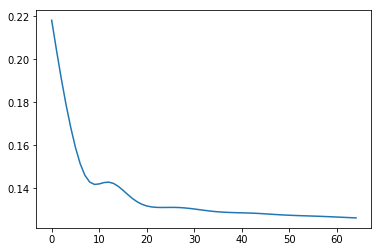

In [32]:
#need to debug if its a vanishing gradient problem or an exploding gradient problem.
import matplotlib.pyplot as plt
plt.plot(epoch_arr,loss_test_arr)
plt.show()


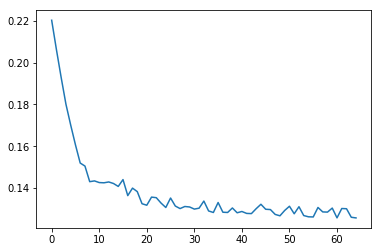

In [33]:
plt.plot(epoch_arr,loss_train_arr)
plt.show()

In [481]:
#Use LSTMS


tf.reset_default_graph()


lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)


In [482]:
n_steps = 5
n_inputs = 1
n_neurons = 1000
n_outputs = 1
n_layers = 1
learning_rate = 0.001
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32,[None,1])
#print(y)

lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units = n_neurons)
outputs,states = tf.nn.dynamic_rnn(lstm_cell,X,dtype=tf.float32)
#logits = tf.contrib.layers.fully_connected(states,n_outputs,activation_fn = tf.nn.relu)
#logits = tf.reshape(logits,[-1,1])
print(states[-1])

#logits is of the shape (?,1)
#logits = tf.layers.dense(top_layer_h_state,n_outputs,name="softmax")
logits = tf.layers.dense(states[-1],n_outputs,name="softmax")
#loss = tf.reduce_mean(tf.square(outputs - y))
#optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
#training_op = optimizer.minimize(loss)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)
print("rank of logits",tf.rank(logits))
#correct = tf.nn.in_top_k(logits, y, 1)
correct = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
pred = tf.argmax(logits, 1)
print("Prediction",pred)
#correct = tf.nn.in_top_k(tf.reshape(logits,[-1,1]),tf.reshape(y,[1]),1)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

init = tf.global_variables_initializer()
print(logits.shape)
#print(X)
#print(y)

Tensor("rnn/while/Exit_4:0", shape=(?, 1000), dtype=float32)
rank of logits Tensor("Rank:0", shape=(), dtype=int32)
Prediction Tensor("ArgMax_2:0", shape=(?,), dtype=int64)
(?, 1)


In [362]:
#states has a shape (?,100)
# whats the shape of top_layer_h_state
#top_layer_h_state is of the shape (?,100)
#logits is of the shape (?,1)
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>

In [473]:
print(states[-1][1])

Tensor("strided_slice_1:0", shape=(1000,), dtype=float32)


In [418]:
#Y_batch_array = Y_batch_array.reshape((-1,5,1))
#print(Y_batch_array.flatten())
#Y_batch_array = Y_batch_array.flatten()
print(X_batch_array.shape)
#print(Y_batch_array.reshape(-1,1).shape)

# The shape of Y batch array is 94,857 examples with 5 dimensions and 1 element in each dimension.
(94857,51)

(474285, 1)


(94857, 51)

In [477]:
#print(Y_batch_df)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_batch_df,Y_batch_df, test_size = 0.33, random_state = 42)


X_train_array = X_train.as_matrix()
X_test_array = X_test.as_matrix()
y_train_array = y_train.iloc[:,-1].as_matrix().reshape([-1,1])
y_test_array = y_test.iloc[:,-1].as_matrix().reshape([-1,1])
print(y_train_array.shape)

(63554, 1)


In [479]:

num_training_examples = len(X_train_array)

#print(y_test[:,-1,:].reshape([-1,1]).shape)
n_epochs = 10
batch_size = 1000

#y_test = y_test[:,-1,:].reshape([-1,1])
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(num_training_examples // batch_size):
            x = np.random.randint(num_training_examples // batch_size)
            batch_start_idx = x * batch_size
            batch_end_idx = batch_start_idx + batch_size
            X_b = X_train_array[batch_start_idx:batch_end_idx]
            y_b = y_train_array[batch_start_idx:batch_end_idx]
            X_b = X_b.reshape((batch_size, n_steps, n_inputs))
            #y_b = y_b[:,-1,:].reshape([-1,1])
            sess.run(training_op, feed_dict={X:X_b,y:y_b})
        X_test = X_test_array.reshape((-1, n_steps, n_inputs))
        acc_train = loss.eval(session = sess,feed_dict={X:X_b,y:y_b})
        acc_test = loss.eval(session = sess,feed_dict = {X:X_test,y:y_test_array})
        print("Epoch",epoch, "Train accuracy = ",acc_train, "Test accuracy = ",acc_test)
        

Epoch 0 Train accuracy =  0.38294 Test accuracy =  0.394496
Epoch 1 Train accuracy =  0.399299 Test accuracy =  0.382869


KeyboardInterrupt: 

In [465]:
#Try reducing the batch size and see if that has an effect on the loss


In [483]:
n_epochs = 10
batch_size = 150

#y_test = y_test[:,-1,:].reshape([-1,1])
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(num_training_examples // batch_size):
            x = np.random.randint(num_training_examples // batch_size)
            batch_start_idx = x * batch_size
            batch_end_idx = batch_start_idx + batch_size
            X_b = X_train_array[batch_start_idx:batch_end_idx]
            y_b = y_train_array[batch_start_idx:batch_end_idx]
            X_b = X_b.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X:X_b,y:y_b})
        X_test = X_test_array.reshape((-1, n_steps, n_inputs))
        acc_train = loss.eval(session = sess,feed_dict={X:X_b,y:y_b})
        acc_test = loss.eval(session = sess,feed_dict = {X:X_test,y:y_test_array})
        print("Epoch",epoch, "Train accuracy = ",acc_train, "Test accuracy = ",acc_test)
        #pred
        probs = xentropy.eval(session = sess, feed_dict={X:X_test,y:y_test_array})
        print("Probs",probs)


Epoch 0 Train accuracy =  0.270735 Test accuracy =  0.382442
Probs [[ 0.05204445]
 [ 0.05204445]
 [ 0.05204445]
 ..., 
 [ 0.05204445]
 [ 0.20376366]
 [ 0.05204445]]
Epoch 1 Train accuracy =  0.372354 Test accuracy =  0.377828
Probs [[ 0.05733157]
 [ 0.05733157]
 [ 0.05733157]
 ..., 
 [ 0.05733157]
 [ 0.11277683]
 [ 0.05733157]]
Epoch 2 Train accuracy =  0.413774 Test accuracy =  0.375683
Probs [[ 0.07322678]
 [ 0.07322678]
 [ 0.07322678]
 ..., 
 [ 0.07322678]
 [ 0.09508227]
 [ 0.07322678]]
Epoch 3 Train accuracy =  0.391973 Test accuracy =  0.374817
Probs [[ 0.07371971]
 [ 0.07371971]
 [ 0.07371971]
 ..., 
 [ 0.07371971]
 [ 0.12676847]
 [ 0.07371971]]
Epoch 4 Train accuracy =  0.432932 Test accuracy =  0.374739
Probs [[ 0.05665072]
 [ 0.05665072]
 [ 0.05665072]
 ..., 
 [ 0.05665072]
 [ 0.11458946]
 [ 0.05665072]]
Epoch 5 Train accuracy =  0.333229 Test accuracy =  0.374639
Probs [[ 0.07451924]
 [ 0.07451924]
 [ 0.07451924]
 ..., 
 [ 0.07451924]
 [ 0.09021712]
 [ 0.07451924]]
Epoch 6 Tr

In [12]:
#probably there is a class imbalance issue
print(Y_batch_df.groupby(['Email6']).count())

        Email2  Email3  Email4  Email5
Email6                                
0        69770   69770   69770   69770
1        25087   25087   25087   25087


There is a class imbalance issue with 0 class dominating the data. We should balance the 0s and 1s


In [6]:
inputs_balanced = inputs.groupby(['Email6'],group_keys = False).apply(lambda x: x.sample(min(len(x),25087)))
X_batch_df_balanced = inputs_balanced.drop(inputs.columns[-1], axis = 1)
Y_batch_df_balanced = inputs_balanced.drop(inputs.columns[0],axis = 1)
y_output = inputs_balanced.columns[-1]


In [7]:
print(Y_batch_df_balanced.groupby(['Email6']).count())

        Email2  Email3  Email4  Email5
Email6                                
0        25087   25087   25087   25087
1        25087   25087   25087   25087


In [8]:
print(inputs_balanced.tail())

       Email1  Email2  Email3  Email4  Email5  Email6
35732       1       1       0       1       1       1
31517       1       1       1       0       1       1
42447       0       0       0       0       0       1
53079       0       1       0       1       1       1
54099       1       0       1       1       1       1


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_batch_df_balanced,Y_batch_df_balanced, test_size = 0.2, random_state = 42)


X_train_array = X_train.as_matrix()
X_test_array = X_test.as_matrix()
y_train_array = y_train.iloc[:,-1].as_matrix()
y_test_array = y_test.iloc[:,-1].as_matrix()
print(y_train_array.shape)

(40139,)


In [58]:
print(y_train_array)

[1 0 1 ..., 1 0 0]


In [59]:
batch_size = 150
n_steps = 5
n_inputs = 1
X_b = X_train_array[0:150]
X_b = X_b.reshape((batch_size, n_steps, n_inputs))
print(X_b)

[[[1]
  [1]
  [0]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [1]
  [0]
  [0]
  [0]]

 [[1]
  [0]
  [1]
  [0]
  [0]]

 [[1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [1]
  [1]]

 [[1]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [1]
  [0]
  [1]]

 [[1]
  [0]
  [1]
  [0]
  [0]]

 [[1]
  [1]
  [1]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[1]
  [0]
  [0]
  [0]
  [0]]

 [[1]
  [1]
  [0]
  [1]
  [0]]

 [[1]
  [1]
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [0]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  [0]
  [1]]

 [[1]
  [1]
  [1]
  [1]
  [1]]

 [[1]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[1]
  [1]
  [1]
  [0]
  [1]]

 [[1]
  [0]
  [1]
  [1]
  [0]]

 [[0]
  [1]
  [0]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[1]
  [1]
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [1]
  [0]
  [0]
  [0]]

 [[1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  

Now reexecute the training with the balanced datase



In [66]:
tf.reset_default_graph()
n_steps = 5
n_inputs = 1
n_neurons = 150
n_outputs = 1
n_layers = 5
learning_rate = 0.001
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32,[None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units = n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs,states = tf.nn.dynamic_rnn(multi_cell,X,dtype=tf.float32)
print("States",states)
logits = tf.layers.dense(states[-1][1],n_outputs,name="softmax")
logits = tf.reshape(logits,(-1,))
print("Logits",logits.shape)
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
training_op = optimizer.minimize(loss)
correct = tf.equal(logits, y)
pred = tf.argmax(logits, 1)
print("Pred",pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

init = tf.global_variables_initializer()

num_training_examples = len(X_train_array)
n_epochs = 10
batch_size = 150
loss_train_arr = []
epoch_arr = []
loss_test_arr = []

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(num_training_examples // batch_size):
            #x = np.random.randint(num_training_examples // batch_size)
            batch_start_idx = iteration * batch_size
            batch_end_idx = batch_start_idx + batch_size
            X_b = X_train_array[batch_start_idx:batch_end_idx]
            y_b = y_train_array[batch_start_idx:batch_end_idx]
            X_b = X_b.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X:X_b,y:y_b})
            #for gv in grads_and_vars:
            #    print(str(sess.run(gv[0],feed_dict={X:X_b,y:y_b})) + " - " + str(sess.run(gv[1].name,feed_dict={X:X_b,y:y_b})))
        
       
    
       
            #print(step, sess.run(W), sess.run(b))
    
        #variables_names =[v.name for v in tf.trainable_variables()]
        #values = sess.run(variables_names)
        #for k,v in zip(variables_names, values):
        #    print(k, v)
        X_test = X_test_array.reshape((-1, n_steps, n_inputs))
        acc_train = loss.eval(session = sess,feed_dict={X:X_b,y:y_b})
        acc_test = loss.eval(session = sess,feed_dict = {X:X_test,y:y_test_array})
        loss_train_arr.append(acc_train)
        epoch_arr.append(epoch)
        loss_test_arr.append(acc_test)
        print("Epoch",epoch, "Train accuracy = ","{:.5f}".format(acc_train), "Test accuracy = ",acc_test)
        

States (LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_9:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_10:0' shape=(?, 150) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_11:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_12:0' shape=(?, 150) dtype=float32>))
Logits (?,)
Pred Tensor("ArgMax:0", shape=(), dtype=int64)
Epoch 0 Train accuracy =  0.51666 Test accuracy =  0.508953
Epoch 1 Train accuracy =  0.47871 Test accuracy =  0.477634
Epoch 2 Train accuracy =  0.45603 Test accuracy =  0.457693
Epoch 3 Train accura

In [67]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_9:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_10:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_11:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_12:0' shape=(?, 150) dtype=float32>))

In [68]:
sess.close()

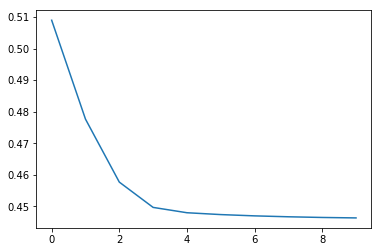

In [70]:
import matplotlib.pyplot as plt
plt.plot(epoch_arr,loss_test_arr)
plt.show()

In [76]:
tf.reset_default_graph()
n_steps = 5
n_inputs = 1
n_neurons = 300
n_outputs = 1
n_layers = 5
learning_rate = 0.001
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32,[None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units = n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs,states = tf.nn.dynamic_rnn(multi_cell,X,dtype=tf.float32)
print("States",states)
logits = tf.layers.dense(states[-1][1],n_outputs,name="softmax")
logits = tf.reshape(logits,(-1,))
print("Logits",logits.shape)
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
training_op = optimizer.minimize(loss)
correct = tf.equal(logits, y)
pred = tf.argmax(logits, 1)
print("Pred",pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

init = tf.global_variables_initializer()

num_training_examples = len(X_train_array)
n_epochs = 50
batch_size = 150
loss_train_arr = []
epoch_arr = []
loss_test_arr = []

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(num_training_examples // batch_size):
            #x = np.random.randint(num_training_examples // batch_size)
            batch_start_idx = iteration * batch_size
            batch_end_idx = batch_start_idx + batch_size
            X_b = X_train_array[batch_start_idx:batch_end_idx]
            y_b = y_train_array[batch_start_idx:batch_end_idx]
            X_b = X_b.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X:X_b,y:y_b})
            #for gv in grads_and_vars:
            #    print(str(sess.run(gv[0],feed_dict={X:X_b,y:y_b})) + " - " + str(sess.run(gv[1].name,feed_dict={X:X_b,y:y_b})))
        
       
    
       
            #print(step, sess.run(W), sess.run(b))
    
        #variables_names =[v.name for v in tf.trainable_variables()]
        #values = sess.run(variables_names)
        #for k,v in zip(variables_names, values):
        #    print(k, v)
        X_test = X_test_array.reshape((-1, n_steps, n_inputs))
        acc_train = loss.eval(session = sess,feed_dict={X:X_b,y:y_b})
        acc_test = loss.eval(session = sess,feed_dict = {X:X_test,y:y_test_array})
        loss_train_arr.append(acc_train)
        epoch_arr.append(epoch)
        loss_test_arr.append(acc_test)
        print("Epoch",epoch, "Train accuracy = ","{:.5f}".format(acc_train), "Test accuracy = ",acc_test)
        

States (LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_9:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_10:0' shape=(?, 150) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_11:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_12:0' shape=(?, 150) dtype=float32>))
Logits (?,)
Pred Tensor("ArgMax:0", shape=(), dtype=int64)
Epoch 0 Train accuracy =  0.45116 Test accuracy =  0.451054
Epoch 1 Train accuracy =  0.45311 Test accuracy =  0.449792
Epoch 2 Train accuracy =  0.45477 Test accuracy =  0.449417
Epoch 3 Train accura

KeyboardInterrupt: 

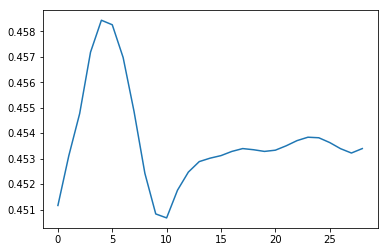

In [77]:
sess.close()
import matplotlib.pyplot as plt
plt.plot(epoch_arr,loss_train_arr)
plt.show()

# Have been using the wrong function to calculate the loss

sigmoid_cross_entropy_with_logits measurues the probability error in discrete classification tasks in which each class is independent and not mutually exclusive. In this case the target class is mutually exclusive. Either the email can be opened or not opened.

So we can use two other functions
tf.nn.softmax_cross_entropy_with_logits_v2 and tf.nn.sparse_softmax_cross_entropy_with_logits


In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_batch_df,Y_batch_df, test_size = 0.33, random_state = 42)


X_train_array = X_train.as_matrix()
X_test_array = X_test.as_matrix()
y_train_array = y_train.iloc[:,-1].as_matrix().reshape([-1,])
y_test_array = y_test.iloc[:,-1].as_matrix().reshape([-1,])
print(y_train_array.shape)

(63554,)


In [128]:
tf.reset_default_graph()
n_steps = 5
n_inputs = 1
n_neurons = 150
n_outputs = 2
n_layers = 5
learning_rate = 0.001
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32,[None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units = n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs,states = tf.nn.dynamic_rnn(multi_cell,X,dtype=tf.float32)
top_layer_h_state = states[-1][1]
print("States",top_layer_h_state)
logits = tf.layers.dense(top_layer_h_state,n_outputs,name = "softmax")
#logits = tf.reshape(logits,(-1,))
print("Logits",logits.shape)
xentropy =  tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
training_op = optimizer.minimize(loss)
#print("Grads and Vars",grads_and_vars)
#correct = tf.equal(logits, y)
#pred = tf.argmax(logits, 1)
#correct = tf.nn.in_top_k(logits,y,1)
#print("Pred",pred)
#accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

init = tf.global_variables_initializer()

num_training_examples = len(X_train_array)
n_epochs = 50
batch_size = 150
loss_train_arr = []
epoch_arr = []
loss_test_arr = []

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(num_training_examples // batch_size):
            #x = np.random.randint(num_training_examples // batch_size)
            batch_start_idx = iteration * batch_size
            batch_end_idx = batch_start_idx + batch_size
            X_b = X_train_array[batch_start_idx:batch_end_idx]
            y_b = y_train_array[batch_start_idx:batch_end_idx]
            X_b = X_b.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X:X_b,y:y_b})
            #for gv in grads_and_vars:
            #    print(str(sess.run(gv[0],feed_dict={X:X_b,y:y_b})) + " - " + str(sess.run(gv[1].name,feed_dict={X:X_b,y:y_b})))
        
       
    
       
            #print(step, sess.run(W), sess.run(b))
    
        #variables_names =[v.name for v in tf.trainable_variables()]
        #values = sess.run(variables_names)
        #for k,v in zip(variables_names, values):
        #    print(k, v)
        X_test = X_test_array.reshape((-1, n_steps, n_inputs))
        acc_train = loss.eval(session = sess,feed_dict={X:X_b,y:y_b})
        acc_test = loss.eval(session = sess,feed_dict = {X:X_test,y:y_test_array})
        loss_train_arr.append(acc_train)
        epoch_arr.append(epoch)
        loss_test_arr.append(acc_test)
        print("Epoch",epoch, "Train accuracy = ","{:.5f}".format(acc_train), "Test accuracy = ",acc_test)

States Tensor("rnn/while/Exit_12:0", shape=(?, 150), dtype=float32)
Logits (?, 2)
Epoch 0 Train accuracy =  0.37164 Test accuracy =  0.377112
Epoch 1 Train accuracy =  0.36137 Test accuracy =  0.374473
Epoch 2 Train accuracy =  0.35664 Test accuracy =  0.373968
Epoch 3 Train accuracy =  0.35590 Test accuracy =  0.373999
Epoch 4 Train accuracy =  0.35484 Test accuracy =  0.374146
Epoch 5 Train accuracy =  0.35448 Test accuracy =  0.374519
Epoch 6 Train accuracy =  0.35441 Test accuracy =  0.374701
Epoch 7 Train accuracy =  0.35365 Test accuracy =  0.374328
Epoch 8 Train accuracy =  0.35324 Test accuracy =  0.37419
Epoch 9 Train accuracy =  0.35307 Test accuracy =  0.374137
Epoch 10 Train accuracy =  0.35297 Test accuracy =  0.374089
Epoch 11 Train accuracy =  0.35265 Test accuracy =  0.374057
Epoch 12 Train accuracy =  0.35215 Test accuracy =  0.374032
Epoch 13 Train accuracy =  0.35168 Test accuracy =  0.374046
Epoch 14 Train accuracy =  0.35126 Test accuracy =  0.374058
Epoch 15 Train

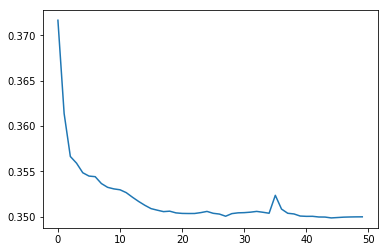

In [129]:
sess.close()
import matplotlib.pyplot as plt
plt.plot(epoch_arr,loss_train_arr)
plt.show()

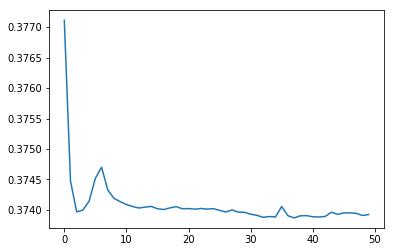

In [130]:
sess.close()
import matplotlib.pyplot as plt
plt.plot(epoch_arr,loss_test_arr)
plt.show()

In [131]:
    confusion = tf.confusion_matrix(labels=y, predictions=logits, num_classes=2)

ValueError: Can not squeeze dim[1], expected a dimension of 1, got 2 for 'confusion_matrix/remove_squeezable_dimensions/Squeeze' (op: 'Squeeze') with input shapes: [?,2].

# Using BG/NBD to model customer probabilities


In [1]:
import sys
!{sys.executable} -m pip install lifetimes

    100% |████████████████████████████████| 614kB 951kB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 1.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for dill ... done
  Stored in directory: /Users/hraja/Library/Caches/pip/wheels/99/c4/ed/1b64d2d5809e60d5a3685530432f6159d6a9959739facb61f2
Successfully built dill
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
from lifetimes import BetaGeoFitter

In [45]:
import pandas as pd
data = pd.read_csv('LorealOpensBGNBD.csv')

In [46]:
data.head()

,x,t.x,T.cal
0,0,0.000000,5.428571
1,9,10.000000,11.428571
2,5,10.000000,11.428571
3,1,0.857143,5.428571
4,8,10.000000,11.428571


In [47]:
dataSample = data.sample(frac = 0.4, replace = False)

In [48]:
bgf = BetaGeoFitter()
bgf.fit(data['x'],data['t.x'],data['T.cal'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 65979 subjects, a: 0.00, alpha: 4.50, b: 2.36, r: 1.76>


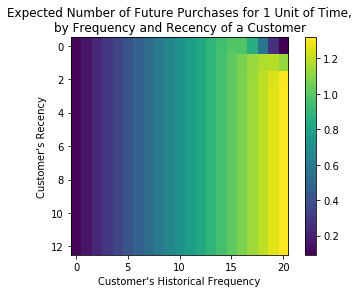

In [49]:
#import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf)
plt.show()

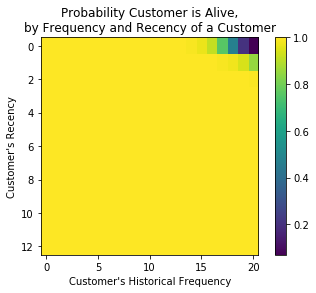

In [50]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf)
plt.show()

In [20]:
data.head()

,x,t.x,T.cal
0,0,0.000000,5.428571
1,9,10.000000,11.428571
2,5,10.000000,11.428571
3,1,0.857143,5.428571
4,8,10.000000,11.428571


In [24]:
print(bgf.conditional_probability_alive(1,0.857,5.42))

0.999999998769108


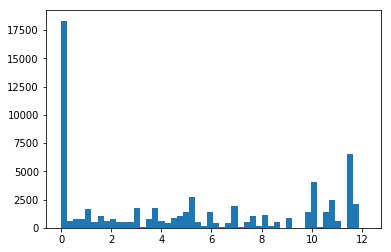

In [35]:
import matplotlib.pyplot as plt
x = data['t.x']
n,bins,patches = plt.hist(x,50)
plt.show()

The amount of subscribers with zero recency is really high..Try to sample some of them.


In [53]:
data['alive_probability'] = data.apply(lambda r: bgf.conditional_probability_alive(r['x'], r['t.x'], r['T.cal']), axis=1)
#data.sort('alive_probability').tail(5)
data.head()

,x,t.x,T.cal,alive_probability
0,0,0.000000,5.428571,1.0
1,9,10.000000,11.428571,0.9999999999597231
2,5,10.000000,11.428571,0.9999999999549385
3,1,0.857143,5.428571,0.9999999996471307
4,8,10.000000,11.428571,0.9999999999594169


In [76]:
data[data['x'] ==0].count()

x                    65979
t.x                  65979
T.cal                65979
alive_probability    65979
dtype: int64

In [94]:
data[data['alive_probability'] < 0.5]

,x,t.x,T.cal,alive_probability


When I have the subscribers with zero frequency, I dont get alive probabilities < 0.5

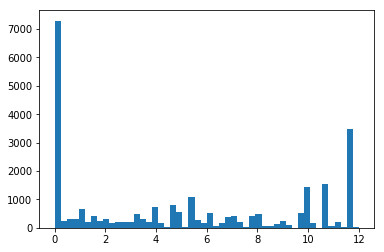

In [39]:
dataSample = data.sample(frac = 0.4, replace = False)
import matplotlib.pyplot as plt
x = dataSample['t.x']
n,bins,patches = plt.hist(x,50)
plt.show()

In [42]:
sampleData = pd.read_csv('LorealOpensBGNBDSample.csv')
bgf = BetaGeoFitter()
bgf.fit(sampleData['x'],sampleData['t.x'],sampleData['T.cal'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 20000 subjects, a: 0.00, alpha: 4.76, b: 0.00, r: 2.60>


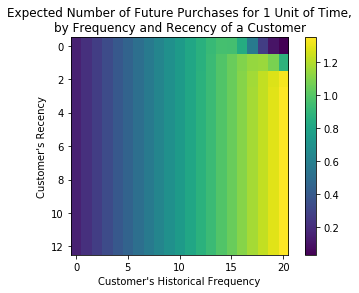

In [43]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf)
plt.show()

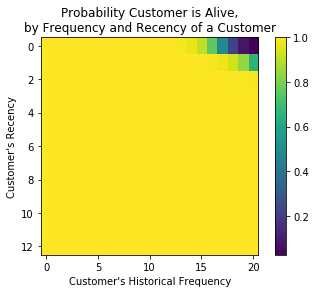

In [44]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf)
plt.show()

data[data['x'] ==0].count()

In [77]:
data[data['x'] ==0].count()

x                    17768
t.x                  17768
T.cal                17768
alive_probability    17768
dtype: int64

THe number of subscribers with zero frequency is high. Lets try excluding them

In [78]:
dataEx = data[data['x'] > 0]
dataEx.count()

x                    48211
t.x                  48211
T.cal                48211
alive_probability    48211
dtype: int64

In [80]:
bgf2 = BetaGeoFitter()
bgf2.fit(dataEx['x'],dataEx['t.x'],dataEx['T.cal'])
print(bgf2)

<lifetimes.BetaGeoFitter: fitted with 48211 subjects, a: 0.00, alpha: 4.79, b: 0.00, r: 2.47>


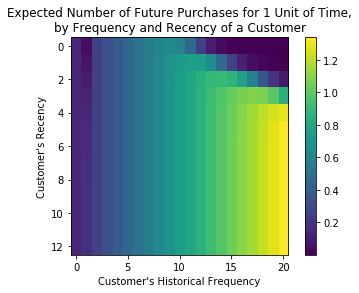

In [90]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf2)
plt.show()

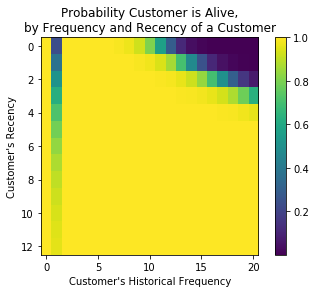

In [82]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf2)
plt.show()

In [83]:
dataEx['alive_probability'] = dataEx.apply(lambda r: bgf2.conditional_probability_alive(r['x'], r['t.x'], r['T.cal']), axis=1)
#data.sort('alive_probability').tail(5)
dataEx.head()

,x,t.x,T.cal,alive_probability
1,9,10.000000,11.428571,0.9999998736444007
2,5,10.000000,11.428571,0.9999998252316039
3,1,0.857143,5.428571,0.756216396101497
4,8,10.000000,11.428571,0.9999998683120326
5,8,5.000000,6.428571,0.999999791242486


In [87]:
dataEx[dataEx['alive_probability'] < 0.5]

,x,t.x,T.cal,alive_probability
30822,1,0.142857,7.714286,0.49037292756046474
41844,1,0.428571,9.000000,0.4544011545150367
41906,1,0.428571,9.000000,0.4544011545150367
41913,1,0.428571,9.000000,0.4544011545150367
41918,1,0.428571,9.000000,0.4544011545150367
41926,1,0.428571,9.000000,0.4544011545150367
41937,1,0.428571,9.000000,0.4544011545150367
41956,1,0.428571,9.000000,0.4544011545150367
41959,1,0.428571,9.000000,0.4544011545150367
41974,1,0.428571,9.000000,0.4544011545150367


If I remove the subscribers with zero frequency then I get alive probabilities less than 0.5 which means a wider range of probabilities.

In [92]:
dataEx[dataEx['x'] > 18].count()

x                    15
t.x                  15
T.cal                15
alive_probability    15
dtype: int64

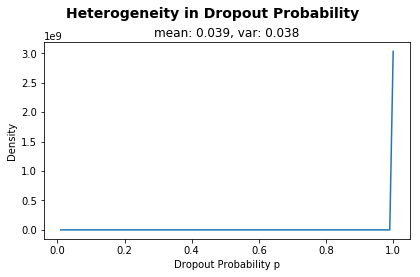

In [93]:
from lifetimes.plotting import plot_dropout_rate_heterogeneity
plot_dropout_rate_heterogeneity(bgf2)
plt.show()

# #Lets use the recency frequency matrix by the month instead of weeks

In [95]:
databyMonth = pd.read_csv('LorealOpensBGNBDMonth.csv')
databyMonth.head()

,x,t.x,T.cal
0,9,2.301370,2.630137
1,5,2.301370,2.630137
2,1,0.197260,1.249315
3,8,2.301370,2.630137
4,8,1.150685,1.479452


In [96]:
bgfMonth = BetaGeoFitter()
bgfMonth.fit(databyMonth['x'],databyMonth['t.x'],dataEx['T.cal'])
print(bgfMonth)

<lifetimes.BetaGeoFitter: fitted with 48211 subjects, a: 2387142.04, alpha: 4.52, b: 8613846.81, r: 13.19>


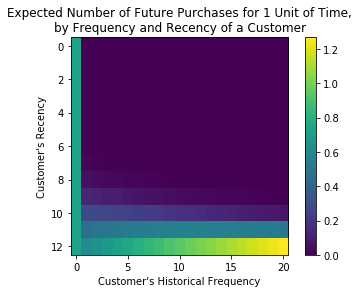

In [97]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgfMonth)
plt.show()

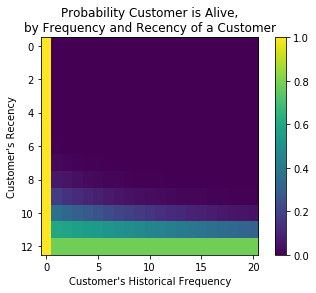

In [98]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgfMonth)
plt.show()

In [99]:
databyMonth['alive_probability'] = databyMonth.apply(lambda r: bgfMonth.conditional_probability_alive(r['x'], r['t.x'], r['T.cal']), axis=1)
#data.sort('alive_probability').tail(5)
databyMonth.head()

,x,t.x,T.cal,alive_probability
0,9,2.301370,2.630137,0.5596403681680803
1,5,2.301370,2.630137,0.6053620764741786
2,1,0.197260,1.249315,0.17222249840291645
3,8,2.301370,2.630137,0.5711982102305411
4,8,1.150685,1.479452,0.5225569952699879


In [101]:
databyMonth[databyMonth['alive_probability'] < 0.1]

,x,t.x,T.cal,alive_probability
261,2,0.230137,1.479452,0.09455680316401739
271,2,0.230137,1.479452,0.09455680316401739
813,2,0.230137,1.479452,0.09455680316401739
951,2,0.230137,1.479452,0.09455680316401739
1095,2,0.230137,1.479452,0.09455680316401739
1450,2,0.230137,1.479452,0.09455680316401739
1460,2,0.230137,1.479452,0.09455680316401739
1469,6,1.610959,2.860274,0.09344442903738598
1533,5,1.380822,2.630137,0.09917293894307573
1700,6,1.610959,2.860274,0.09344442903738598
